<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'TSLA'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,62.400002,64.421997,62.200001,64.106003,64.106003,21761000
1,2018-01-03,64.199997,65.050003,63.110001,63.450001,63.450001,22607500
2,2018-01-04,62.574001,63.709999,61.136002,62.924000,62.924000,49731500
3,2018-01-05,63.324001,63.448002,62.400002,63.316002,63.316002,22956000
4,2018-01-08,63.200001,67.403999,63.099998,67.281998,67.281998,49297000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,296.200318,302.779898,289.267365,296.510395,296.510395,4.795478e+07
std,315.684113,322.482561,308.394212,316.012723,316.012723,3.214016e+07
min,36.220001,37.335999,35.397999,35.793999,35.793999,9.800600e+06
25%,60.123999,61.223999,58.768000,60.042000,60.042000,2.685705e+07
50%,85.582001,86.695999,82.099998,85.528000,85.528000,3.726250e+07
75%,602.190002,616.690002,592.255005,604.779999,604.779999,5.963275e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,3.046940e+08


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

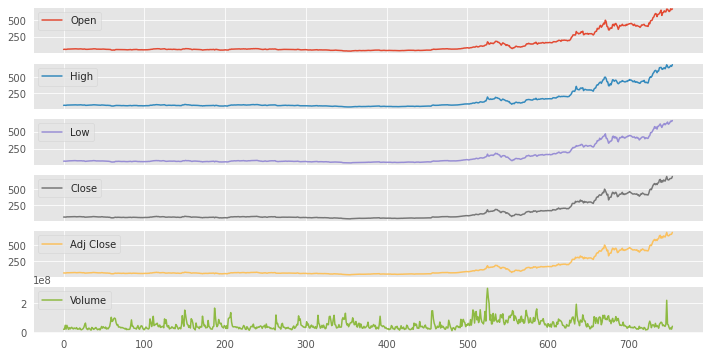

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


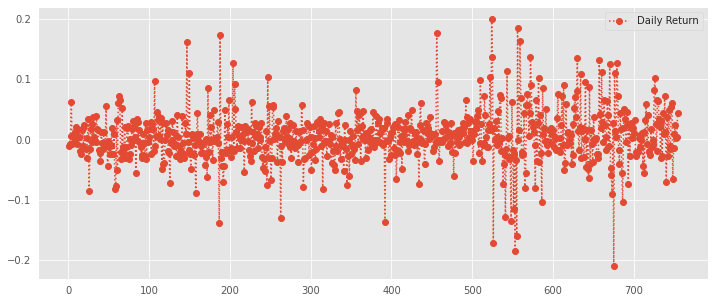

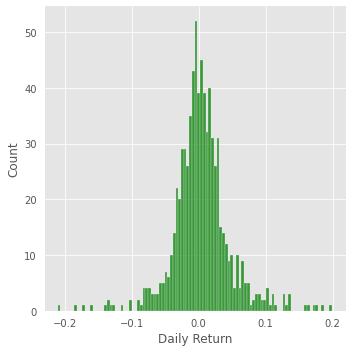

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02   62.400002   64.421997   62.200001   64.106003   64.106003   
1    2018-01-03   64.199997   65.050003   63.110001   63.450001   63.450001   
2    2018-01-04   62.574001   63.709999   61.136002   62.924000   62.924000   
3    2018-01-05   63.324001   63.448002   62.400002   63.316002   63.316002   
4    2018-01-08   63.200001   67.403999   63.099998   67.281998   67.281998   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  632.200012  651.500000  622.570007  645.979980  645.979980   
751  2020-12-24  642.989990  666.090027  641.000000  661.770020  661.770020   
752  2020-12-28  674.510010  681.400024  660.799988  663.690002  663.690002   
753  2020-12-29  661.000000  669.900024  655.000000  665.989990  665.989990   
754  2020-12-30  672.000000  696.599976  668.359985  694.780029  694.780029   

       Volume  MA for 10 days  MA for 50 days  MA f

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

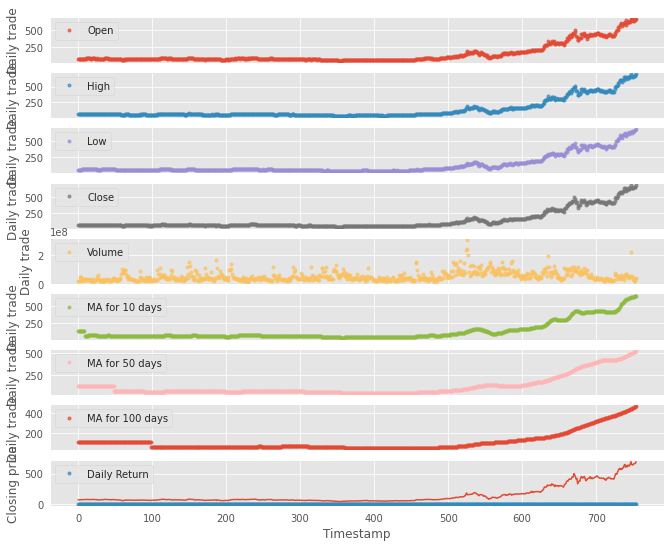

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

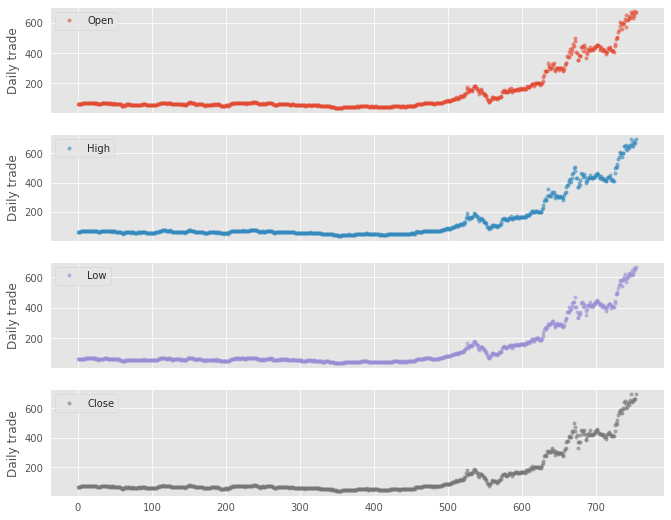

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date        Open        High         Low       Close   Adj Close  \
0    2018-01-02   62.400002   64.421997   62.200001   64.106003   64.106003   
1    2018-01-03   64.199997   65.050003   63.110001   63.450001   63.450001   
2    2018-01-04   62.574001   63.709999   61.136002   62.924000   62.924000   
3    2018-01-05   63.324001   63.448002   62.400002   63.316002   63.316002   
4    2018-01-08   63.200001   67.403999   63.099998   67.281998   67.281998   
..          ...         ...         ...         ...         ...         ...   
750  2020-12-23  632.200012  651.500000  622.570007  645.979980  645.979980   
751  2020-12-24  642.989990  666.090027  641.000000  661.770020  661.770020   
752  2020-12-28  674.510010  681.400024  660.799988  663.690002  663.690002   
753  2020-12-29  661.000000  669.900024  655.000000  665.989990  665.989990   
754  2020-12-30  672.000000  696.599976  668.359985  694.780029  694.780029   

       Volume  MA for 10 days  MA for 50 days  MA f

,count,mean,std,min,25%,50%,75%,max
Open,755.0,1.352684e+02,1.444070e+02,3.622000e+01,5.663200e+01,6.675000e+01,1.479450e+02,6.745100e+02
High,755.0,1.387261e+02,1.484182e+02,3.733600e+01,5.764400e+01,6.798000e+01,1.547720e+02,6.966000e+02
Low,755.0,1.317262e+02,1.401556e+02,3.539800e+01,5.544300e+01,6.550000e+01,1.428320e+02,6.683600e+02
Close,755.0,1.356006e+02,1.451921e+02,3.579400e+01,5.683200e+01,6.681400e+01,1.497030e+02,6.950000e+02
Adj Close,755.0,1.356006e+02,1.451921e+02,3.579400e+01,5.683200e+01,6.681400e+01,1.497030e+02,6.950000e+02
Volume,755.0,5.477046e+07,3.380961e+07,1.232800e+07,3.169025e+07,4.312900e+07,6.919875e+07,3.046940e+08
MA for 10 days,755.0,1.328269e+02,1.386120e+02,3.799900e+01,5.699540e+01,6.684120e+01,1.472631e+02,6.596080e+02
MA for 50 days,755.0,1.223607e+02,1.151346e+02,4.386284e+01,5.854374e+01,6.515768e+01,1.284072e+02,5.280288e+02
MA for 100 days,755.0,1.121672e+02,9.346910e+01,4.531518e+01,6.151099e+01,6.368174e+01,1.121672e+02,4.682399e+02
Daily Return,755.0,4.086269e-03,4.297572e-02,-2.106283e-01,-1.751715e-02,2.177985e-03,2.267295e-02,1.989486e-01


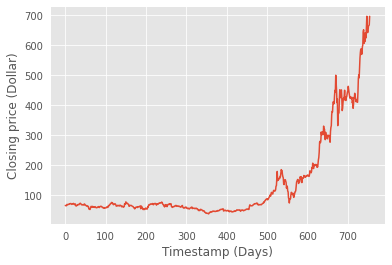

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 11s 165ms/step - loss: 0.5062 - mse: 0.5062 - mae: 0.4845 - val_loss: 0.2263 - val_mse: 0.2263 - val_mae: 0.3292
Epoch 2/40
14/14 [==============================] - 0s 33ms/step - loss: 0.1675 - mse: 0.1675 - mae: 0.2838 - val_loss: 0.1747 - val_mse: 0.1747 - val_mae: 0.2940
Epoch 3/40
14/14 [==============================] - 0s 33ms/step - loss: 0.1474 - mse: 0.1474 - mae: 0.2564 - val_loss: 0.1371 - val_mse: 0.1371 - val_mae: 0.2396
Epoch 4/40
14/14 [==============================] - 0s 33ms/step - loss: 0.1255 - mse: 0.1255 - mae: 0.2320 - val_loss: 0.1237 - val_mse: 0.1237 - val_mae: 0.2338
Epoch 5/40
14/14 [==============================] - 0s 33ms/step - loss: 0.1248 - mse: 0.1248 - mae: 0.2203 - val_loss: 0.1167 - val_mse: 0.1167 - val_mae: 0.2245
Epoch 6/40
14/14 [==============================] - 0s 33ms/step - loss: 0.1221 - mse: 0.1221 - mae: 0.2215 - val_loss: 0.1456 - val_mse: 0.1456 - val_mae: 0.2789
Epoch 7/40
14/14 [==

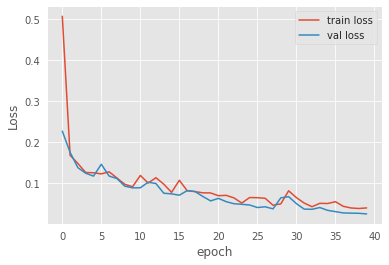

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

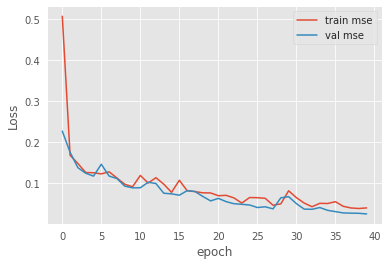

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

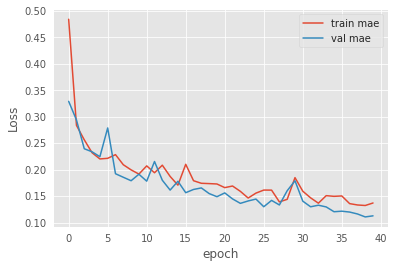

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 7ms/step - loss: 0.0246 - mse: 0.0246 - mae: 0.1127


[0.02461431361734867, 0.02461431361734867, 0.11270489543676376]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.969657
R2 Score: 0.969657
Max Error: 0.661052


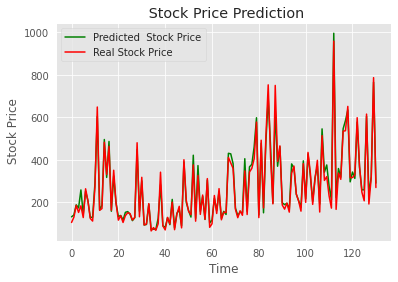

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 8ms/step - loss: 0.0590 - mse: 0.0590 - mae: 0.1711


[0.059019580483436584, 0.059019580483436584, 0.17110958695411682]

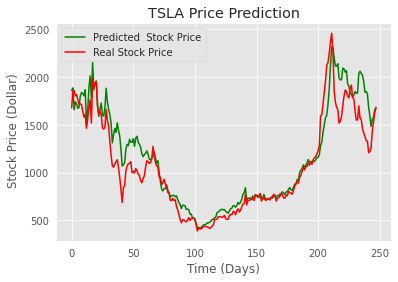

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()